In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [451]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-4, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.lambd_arr = []
        
        self.index_support_vectors = []
        self.lam_sv = []
        self.n_support_vectors = []
        self.y_sv = []
        self.x_sn = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # サンプル数分のラグランジュ乗数  λ を作成
        self.lambd_arr = np.random.rand(X.shape[0])
        # self.lambd_arr = np.array([8, 3, 5, 9, 1]) # TEST
        self.lambd_arr = self.lambd_arr.reshape(-1, 1)
        
        # ラグランジュ未定乗数法により、ラムダの値を更新
        self._lagrange(X, y)
        # elf._test("self.lambd_arr",self.lambd_arr)
        
        # サポートベクトルを決定
        self.index_support_vectors = np.where(self.threshold < self.lambd_arr)[0].tolist()
        self.lam_sv = self.lambd_arr[self.index_support_vectors]
        self.n_support_vectors = self.lam_sv.shape[0]
        self.y_sv = y[self.index_support_vectors].reshape(-1, 1)
        self.x_sn = X[self.index_support_vectors]
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    # ラグランジュの未定乗数法によりラムダの値を更新
    def _lagrange(self, X, y):

        # イテレータ分繰り返す
        for _itr in range(self.iter):
            
            # 現在のラムダ
            now_lmd_arr = self.lambd_arr.copy()
            # np.append(tmp,self.lambd_arr[0].copy)
            # サンプル数分繰り返す
            for i in range(X.shape[0]):

                lmd_j = now_lmd_arr.reshape(-1,1)
                y_i   = y.reshape(-1,1)
                y_j   = y.reshape(-1,1).T
                k = self._calc_kernel(X, X)
                
                #self._test("lmd_j",lmd_j)
                #self._test("y_i @ y_j",y_i @ y_j)
                #self._test("k",k)
                
                # delta = 1 - np.sum( lmd_j @ (y_i @ y_j * k))
                delta = np.sum( lmd_j.T @ (y_i @ y_j * k), axis = 0)
                delta = delta.reshape(-1, 1)
                
                # パラメータ（ラムダ）の値を更新
                self.lambd_arr = (now_lmd_arr + self.lr*(1-delta)).copy()
                
                # ゼロ以下のラムダをゼロに調整
                self.lambd_arr = np.where(self.lambd_arr < 0, 0, self.lambd_arr)
                
        # plt.plot(np.arange(self.iter),tmp)
        
    # カーネル関数
    def _calc_kernel(self, X, X2):
        
        x_i = X.T
        x_j = X2
        return x_j @ x_i
    
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        k = self._calc_kernel(X, self.x_sn)
        # self._test("k",k)
        tmp = np.sum(self.lam_sv)
        # self._test("tmp",tmp)
        # self._test("self.y_sv",self.y_sv)
        fx = (tmp * self.y_sv).T@k
        
        result = np.where(fx < 0, -1, 1 )
        return result
    
    def _test(self, name, obj):
        m = "      "
        print(m)
        print(m, name)
        print(m,"shape:", obj.shape)
        print(m,obj)

In [453]:
X = np.array([[1, 2],[3, 4], [5, 6], [7, 8], [9, 10]])#X_train
y = np.array([1, -1, 1, -1, 1])
y = y.reshape(-1, 1)

scr_svm = ScratchSVMClassifier(1, 0.01, verbose=True)
scr_svm.fit(X, y)
X_tt = np.arange(10, 0, -1).reshape(-1, 2)#X_test

# 検算用
# plot_decision_regions(X, y.reshape(y.shape[0],), scr_svm)

In [454]:
# データの準備
import numpy as np
np.random.seed(seed=0)
n_samples = 500#500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

# サンプルデータ１を分割
from sklearn.model_selection import train_test_split

# シード値は random_state（データを分割する際の乱数のシード値）で指定できます。
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("  X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))
# print(X)
# print(y)

  X_train.shape : (375, 2), X_test.shape : (125, 2)


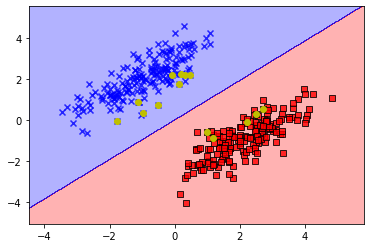

In [455]:
scr_svm = ScratchSVMClassifier(100, 0.0005, verbose=True)

scr_svm.fit(X_train, y_train)
scr_svm.predict(X_test)
plot_decision_regions(X_train, y_train.reshape(y_train.shape[0],), scr_svm)

In [456]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 決定領域のプロット
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元にグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # テストサンプルを目立たせる
    if test_idx:
        # すべてのサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')
    plt.scatter(classifier.x_sn[:,0], classifier.x_sn[:,1], c="y")

In [457]:
scr_svm.x_sn[:,0]

array([ 1.18894987,  2.20548127,  0.31731679,  0.17960016, -0.50179779,
       -0.0791894 ,  0.9829958 , -0.97854994,  0.46861035,  2.49174927,
        2.70709974,  0.14096048, -1.76320579, -1.11362696])